In [9]:
from problems.golomb_simple import udp

In [10]:
# Relative position and velocity of satellites: dx, dy, dz, dvx, dvy, dvz
satellite_1 = [ 0.1,  0.0,  0.1, -0.0042, -0.004,  0.0023]
satellite_2 = [ 0.0,  0.2,  0.4, -0.0001,  0.001,  0.0003]
satellite_3 = [ 0.0, -0.1,  0.3,  0.0201,  0.025,  0.0001]
satellite_4 = [ 0.2,  0.0, -0.2, -0.0001,  0.003, -0.0100]
satellite_5 = [ 0.1, -0.2, -0.3,  0.0000,  0.001, -0.0117]

all_satellites = [satellite_1 , satellite_2 , satellite_3 , satellite_4 , satellite_5]

In [11]:
# Encode into [x,x,x,x,x,x,y,y,y,y,....,vz,vz,vz,vz,vz,vz]
x_encoded = [dx[i] for i in range(6) for dx in all_satellites]

[-0.02040816326530612]

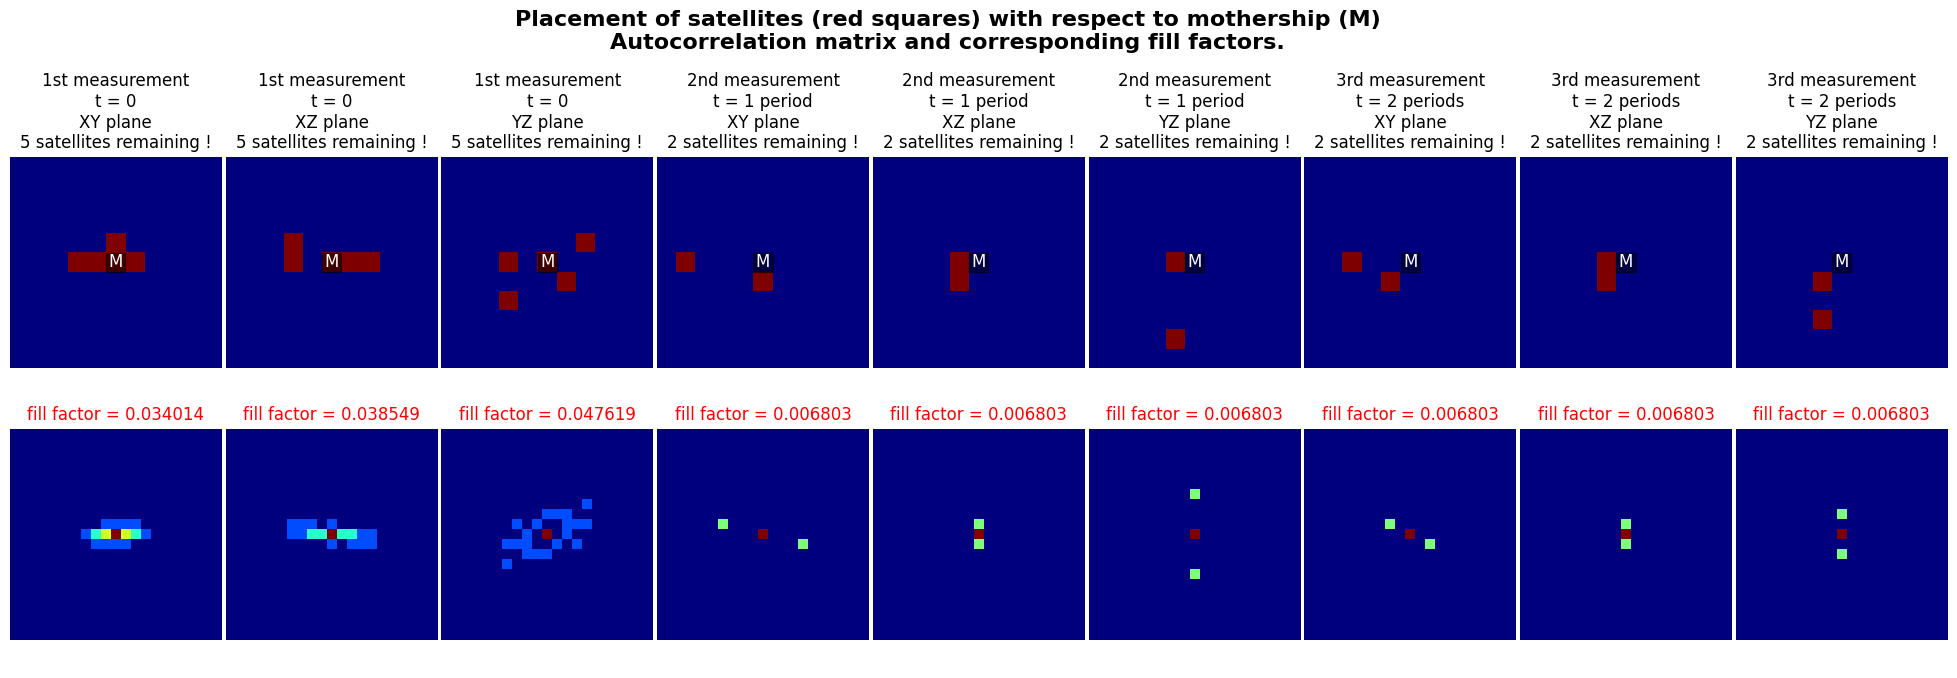

In [12]:
# Call only the udp fitness
fitness = udp.fitness(x_encoded)

# This function calls the udp fitness and plots the solution
udp.plot(x_encoded, figsize=(25,7))

In [116]:
import numpy as np

def brute_force_optimization(all_satellites, step_size=0.001, iterations_per_parameter=180):
    # Encode the initial configuration
    best_configuration = [param[i] for i in range(6) for param in all_satellites]
    best_fitness = udp.fitness(best_configuration)[0]
    
    for i in range(len(all_satellites)):  # Iterate over all satellites
        for j in range(6):  # Iterate over each parameter (dx, dy, dz, dvx, dvy, dvz)
            for step in np.linspace(-iterations_per_parameter * step_size, 
                                    iterations_per_parameter * step_size, 
                                    2 * iterations_per_parameter + 1):
                temp_satellites = [sat.copy() for sat in all_satellites]
                temp_satellites[i][j] += step
                
                # Encode the current configuration
                x_encoded = [param[k] for k in range(6) for param in temp_satellites]
                
                # Evaluate fitness
                fitness = udp.fitness(x_encoded)[0]
                
                # Update best configuration if more negative fitness is found
                if fitness < best_fitness:
                    best_fitness = fitness
                    best_configuration = x_encoded
                    all_satellites = temp_satellites  # Update all_satellites with the new best configuration
                    print(f"New best fitness: {best_fitness} with step {step} on satellite {i+1}, parameter {j+1}")
    
    return best_fitness, all_satellites

Running with step size 0.1 and 10 iterations per parameter
New best fitness: -0.03854875283446712 with step 0.10000000000000009 on satellite 1, parameter 1
New best fitness: -0.047619047619047616 with step -1.0 on satellite 1, parameter 3
New best fitness: -0.07482993197278912 with step -0.19999999999999996 on satellite 4, parameter 1
New best fitness: -0.08390022675736962 with step -0.29999999999999993 on satellite 4, parameter 2
New best fitness: -0.08843537414965986 with step 0.8 on satellite 4, parameter 3
New best fitness: -0.10204081632653061 with step 0.10000000000000009 on satellite 5, parameter 1
Best fitness after this step: -0.10204081632653061
Running with step size 0.01 and 180 iterations per parameter
New best fitness: -0.10657596371882086 with step -0.030000000000000027 on satellite 1, parameter 1
New best fitness: -0.1111111111111111 with step -0.48 on satellite 1, parameter 2
New best fitness: -0.11564625850340136 with step 0.3699999999999999 on satellite 1, parameter 

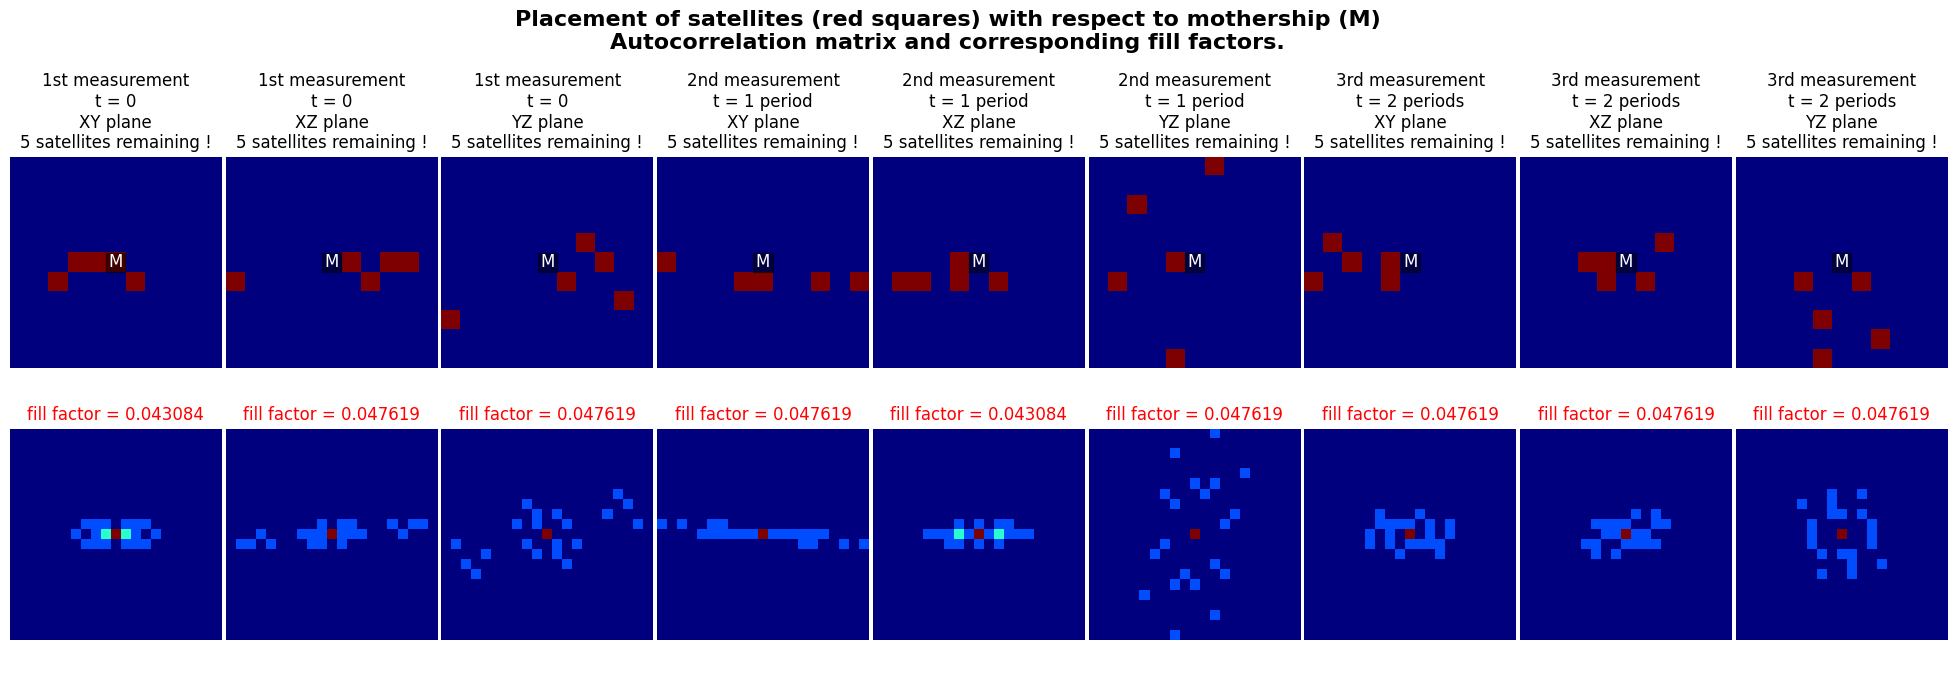

In [136]:

# Example usage
satellite_1 = [-0.09,  0.0,  0.1, -0.0042, -0.004,  0.0023]
satellite_2 = [ 0.0,  0.2,  0.4, -0.0001,  0.001,  0.0003]
satellite_3 = [ 0.0, -0.1,  0.3,  0.0201,  0.025,  0.0001]
satellite_4 = [ 0.2,  0.0, -0.2, -0.0001,  0.003, -0.0100]
satellite_5 = [-0.1, -0.2, -0.3,  0.0000,  0.001, -0.0117]

all_satellites = [satellite_1, satellite_2, satellite_3, satellite_4, satellite_5]
# all_satellites = [[-0.019999999999999934, -0.48, -0.9, -0.0042, -0.004, 0.3722999999999999], [-0.020000000000000018, 0.2, 0.4, -0.0001, 0.001, 0.0003], [0.0, -0.1, 0.3, 0.0201, 0.025, 0.0001], [5.551115123125783e-17, 1.1102230246251565e-16, 0.6000000000000001, -0.0001, 0.003, 1.79], [8.326672684688674e-17, -0.2, 0.8199999999999998, 0.0, 0.001, -0.0117]]
best_configuration = all_satellites


# Running the optimization function
# List of step_size and iterations_per_parameter pairs
optimization_steps = [
    [0.1, 10],
    [0.01, 180]
]

for step_size, iterations in optimization_steps:
    print(f"Running with step size {step_size} and {iterations} iterations per parameter")
    best_fitness, best_configuration = brute_force_optimization(best_configuration, step_size=step_size, iterations_per_parameter=iterations)
    print(f"Best fitness after this step: {best_fitness}")

print(f"Final best fitness: {best_fitness}")
# Plot the best configuration
udp.plot([param[i] for i in range(6) for param in best_configuration], figsize=(25,7))

# Display the best fitness value
print(f"Best fitness achieved: {best_fitness}")